# 3 数据清洗处理
## 读取文件

In [1]:
import pandas as pd
detail = pd.read_csv('../data/detail.csv', index_col=0,encoding = 'gbk')

## 3.1 重复值处理
### 3.1.1 记录去重
#### 方法一：利用列表去重

In [2]:
##定义去重函数
def delRep(list1):
    list2=[]
    for i in list1:
        if i not in list2:
            list2.append(i)
    return list2 

In [3]:
dishes=list(detail['dishes_name']) ##将dishes_name从数据框中提取出来
print('去重前菜品总数为：',len(dishes)) 
dish = delRep(dishes) ##使用自定义的去重函数去重
print('方法一去重后菜品总数为：',len(dish))

去重前菜品总数为： 10037
方法一去重后菜品总数为： 145


#### 方法二：利用集合的元素是唯一的特性去重

In [4]:
print('去重前菜品总数为：',len(dishes)) 
dish_set = set(dishes) ##利用set的特性去重
print('方法二去重后菜品总数为：',len(dish_set))

去重前菜品总数为： 10037
方法二去重后菜品总数为： 145


#### 方法三：利用pandas库的drop_duplicates方法去重

In [5]:
print('去重前菜品总数为：',len(dishes)) 
dishes_name = detail['dishes_name'].drop_duplicates()
print('方法三去重后菜品总数为：',len(dishes_name))

去重前菜品总数为： 10037
方法三去重后菜品总数为： 145


### 3.1.2 特征去重

In [6]:
##定义求取特征是否完全相同的矩阵的函数
def FeatureEquals(df):
    dfEquals=pd.DataFrame([],columns=df.columns,index=df.columns)
    for i in df.columns:
       for j in df.columns:
           dfEquals.loc[i,j]=df.loc[:,i].equals(df.loc[:,j])
    return dfEquals
## 应用上述函数
detEquals=FeatureEquals(detail)
print('detail的特征相等矩阵的前5行5列为：\n',detEquals.iloc[:5,:5])

detail的特征相等矩阵的前5行5列为：
                    order_id  dishes_id  logicprn_name  parent_class_name  \
order_id               True      False          False              False   
dishes_id             False       True          False              False   
logicprn_name         False      False           True               True   
parent_class_name     False      False           True               True   
dishes_name           False      False          False              False   

                   dishes_name  
order_id                 False  
dishes_id                False  
logicprn_name            False  
parent_class_name        False  
dishes_name               True  


In [7]:
##遍历所有数据
lenDet = detEquals.shape[0]
dupCol = []
for k in range(lenDet):
    for l in range(k+1,lenDet):
        if detEquals.iloc[k,l] & (detEquals.columns[l] not in dupCol):
            dupCol.append(detEquals.columns[l])
##进行去重操作
print('需要删除的列为：',dupCol)
detail.drop(dupCol,axis=1,inplace=True)
print('删除多余列后detail的特征数目为：',detail.shape[1])

需要删除的列为： ['parent_class_name', 'cost', 'discount_amt', 'discount_reason', 'kick_back', 'add_info', 'bar_code', 'add_inprice']
删除多余列后detail的特征数目为： 10


## 3.2 缺失值处理
### 3.2.1 利用isnull或notnull找到缺失值

In [8]:
print('detail每个特征缺失的数目为：\n',detail.isnull().sum())
print('detail每个特征非缺失的数目为：\n',detail.notnull().sum())

detail每个特征缺失的数目为：
 order_id                0
dishes_id               0
logicprn_name       10037
dishes_name             0
itemis_add              0
counts                  0
amounts                 0
place_order_time        0
picture_file            0
emp_id                  0
dtype: int64
detail每个特征非缺失的数目为：
 order_id            10037
dishes_id           10037
logicprn_name           0
dishes_name         10037
itemis_add          10037
counts              10037
amounts             10037
place_order_time    10037
picture_file        10037
emp_id              10037
dtype: int64


### 3.2.2 删除法

In [9]:
print('去除缺失的列前detail的形状为：', detail.shape)
print('去除缺失的列后detail的形状为：', detail.dropna(axis = 1,how ='any').shape)

去除缺失的列前detail的形状为： (10037, 10)
去除缺失的列后detail的形状为： (10037, 9)


### 3.2.3 替换法

In [10]:
detail = detail.fillna(-99)
print('detail每个特征缺失的数目为：\n',detail.isnull().sum())

detail每个特征缺失的数目为：
 order_id            0
dishes_id           0
logicprn_name       0
dishes_name         0
itemis_add          0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
dtype: int64


### 3.2.4 插值法

In [11]:
## 数据准备
import numpy as np
from scipy.interpolate import interp1d
x=np.array([1,2,3,4,5,8,9,10]) ##创建自变量x
y1=np.array([2,8,18,32,50,128,162,200]) ##创建因变量y1
y2=np.array([3,5,7,9,11,17,19,21]) ##创建因变量y2

#### 1. 线性插值

In [12]:
LinearInsValue1 = interp1d(x,y1,kind='linear') ##线性插值拟合x,y1
LinearInsValue2 = interp1d(x,y2,kind='linear') ##线性插值拟合x,y2
print('当x为6、7时，使用线性插值y1为：',LinearInsValue1([6,7]))
print('当x为6、7时，使用线性插值y2为：',LinearInsValue2([6,7]))

当x为6、7时，使用线性插值y1为： [ 76. 102.]
当x为6、7时，使用线性插值y2为： [13. 15.]


#### 2. 多项式插值

In [13]:
from scipy.interpolate import lagrange
LargeInsValue1 = lagrange(x,y1) ##拉格朗日插值拟合x,y1
LargeInsValue2 = lagrange(x,y2) ##拉格朗日插值拟合x,y2
print('当x为6,7时，使用多项式插值y1为：',LargeInsValue1([6,7]))
print('当x为6,7时，使用多项式插值y2为：',LargeInsValue2([6,7]))

当x为6,7时，使用多项式插值y1为： [72. 98.]
当x为6,7时，使用多项式插值y2为： [13. 15.]


#### 3. 样条插值

In [14]:
from scipy.interpolate import make_interp_spline
##样条插值拟合x,y1
SplineInsValue1 = make_interp_spline(x,y1)(np.array([6,7]))
##样条插值拟合x,y2
SplineInsValue2 = make_interp_spline(x,y2)(np.array([6,7]))
print('当x为6,7时，使用样条插值y1为：',SplineInsValue1)
print('当x为6,7时，使用样条插值y2为：',SplineInsValue2)

当x为6,7时，使用样条插值y1为： [72. 98.]
当x为6,7时，使用样条插值y2为： [13. 15.]


## 3.3 异常值处理
### 3.3.1 拉依达准则

In [15]:
## 定义拉依达准则识别异常值函数
def outRange(Ser1):
    boolInd = (Ser1.mean()-3*Ser1.std()>Ser1) | \
    (Ser1.mean()+3*Ser1.var()< Ser1)
    index = np.arange(Ser1.shape[0])[boolInd]
    outrange = Ser1.iloc[index]
    return outrange
outlier = outRange(detail['counts'])
print('使用拉依达准则判定异常值个数为:',outlier.shape[0])
print('异常值的最大值为：',outlier.max())
print('异常值的最小值为：',outlier.min())

使用拉依达准则判定异常值个数为: 209
异常值的最大值为： 10
异常值的最小值为： 3


### 3.3.2 箱线图分析

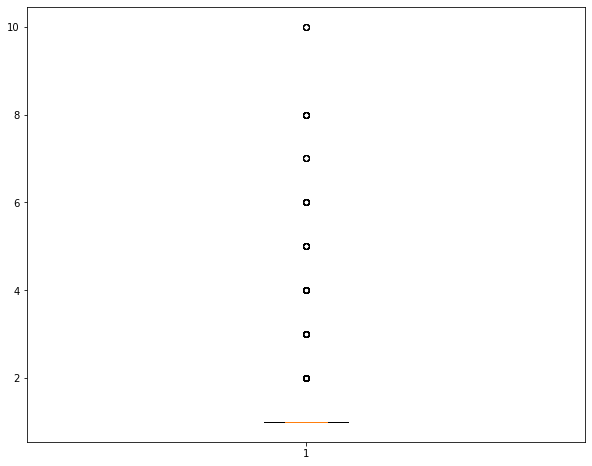

销售量数据异常值个数为： 516
销售量数据异常值的最大值为： 10
销售量数据异常值的最小值为： 2


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8)) 
p = plt.boxplot(detail['counts'].values,notch=True)   ##画出箱线图
outlier1 = p['fliers'][0].get_ydata()   ##fliers为异常值的标签
plt.show()
print('销售量数据异常值个数为：',len(outlier1))
print('销售量数据异常值的最大值为：',max(outlier1))
print('销售量数据异常值的最小值为：',min(outlier1))